In [11]:
import datetime
import json
import os
import sys
import yaml
from glob import glob
from copy import deepcopy
from pprint import pprint

import numpy as np
from corner import corner

# enable use of local modules
repo_dir = '/grad/bwedig/mejiro'
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

from mejiro.utils import util

# read configuration file
with open('config.yaml', 'r') as f:
    config = yaml.load(f, Loader=yaml.SafeLoader)

In [12]:
if config['dev']:
    config['pipeline_dir'] += '_dev'

total = config['survey']['total_population']

In [13]:
with open(os.path.join(config['data_dir'], config['pipeline_dir'], 'execution_times.json'), 'r') as f:
    execution_times = json.load(f)

pprint(execution_times)

{'01': '0:37:29',
 '02': '0:42:36',
 '03': '0:15:08',
 '04': '0:01:23',
 '05': '0:50:58'}


In [14]:
total_time = 0
for script_name, times in execution_times.items():
    h, m, s = times.split(':')
    if 'days' in h:
        d, h = h.split('days, ')
        h = int(d) * 24 + int(h)
    elif 'day' in h:
        d, h = h.split('day, ')
        h = int(d) * 24 + int(h)
    time = (int(h) * 3600) + (int(m) * 60) + int(s)
    total_time += time

print(
    f'Total pipeline execution time: {total_time} seconds or {datetime.timedelta(seconds=total_time)} ({total_time / 3600:.2f} hours)')

Total pipeline execution time: 8854 seconds or 2:27:34 (2.46 hours)


In [15]:
survey_area = config['survey']['area']
runs = config['survey']['runs']

total_area = survey_area * runs
print(f'{runs} run(s) of {survey_area} sq. deg. each gives {total_area:.2f} sq. deg. total')

342 run(s) of 0.5 sq. deg. each gives 171.00 sq. deg. total


In [16]:
data_dir = os.path.join(config['data_dir'], config['pipeline_dir'], '01')

detectable_csv = os.path.join(data_dir, 'detectable_pop.csv')
detectable_df = util.combine_all_csvs(data_dir, 'detectable', detectable_csv)

if total:
    total_csv = os.path.join(data_dir, 'total_pop.csv')
    total_df = util.combine_all_csvs(data_dir, 'total', total_csv)

Wrote combined CSV to /data/bwedig/mejiro/training_set_dev/01/detectable_pop.csv


In [17]:
det_per_sq_deg = len(detectable_df) / total_area
print(f'Detectable strong lenses per sq. deg.: {det_per_sq_deg:.2f}')

Detectable strong lenses per sq. deg.: 57.63


In [24]:
print(f'Execution time per detectable system: {total_time / len(detectable_df):.2f} seconds')
print(f'Execution time per sq. deg.: {total_time / total_area:.2f} seconds')

Execution time per detectable system: 0.90 seconds
Execution time per sq. deg.: 51.78 seconds


In [19]:
detectable_df

,vel_disp,m_star,theta_e,z_lens,z_source,magnification,num_images,snr,mag_F062_lens,mag_F062_source,...,mag_F184_lens,mag_F184_source,mag_F184_source_magnified,mag_F146_lens,mag_F146_source,mag_F146_source_magnified,mag_F213_lens,mag_F213_source,mag_F213_source_magnified,Unnamed: 0
0,211.572373,3.294706e+11,0.465621,1.670144,4.220363,1.837246,2,59.104176,26.284312,23.420707,...,21.563631,22.577872,21.917453,22.180489,22.836684,22.176265,21.304167,22.141202,21.480784,NaN
1,225.561671,3.922503e+11,0.463101,1.561640,3.217866,1.691465,2,51.180167,24.840047,23.393979,...,20.998325,21.582575,21.011918,21.561885,22.223888,21.653230,20.772278,21.366832,20.796174,NaN
2,230.425332,4.224496e+11,0.751091,1.156439,4.089509,2.547388,2,66.622732,23.251606,23.205696,...,20.089613,22.329793,21.314555,20.522885,22.620980,21.605743,19.832467,21.923726,20.908488,NaN
3,223.656156,3.867986e+11,0.871037,0.876738,4.681563,3.622991,2,59.772728,22.544065,23.794589,...,19.408107,23.181773,21.784104,19.858502,23.315826,21.918158,19.263497,22.849481,21.451813,NaN
4,269.175380,5.620914e+11,0.800621,1.354694,3.318136,3.275499,2,50.668744,23.966797,24.005542,...,20.294724,22.343175,21.054981,20.834788,23.041475,21.753281,20.050002,21.960814,20.672620,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9849,190.230242,2.410303e+11,0.445821,1.351257,3.966210,2.088483,2,58.112867,23.424728,23.967631,...,20.680505,22.159058,21.359480,21.017002,22.695586,21.896009,20.512884,21.626537,20.826959,4922.0
9850,305.928158,5.917007e+11,1.491667,0.694227,2.304982,6.125095,2,164.203525,21.094659,24.072414,...,18.340853,21.565365,19.597583,18.745627,22.083710,20.115928,18.247388,21.309148,19.341366,4923.0
9851,473.647648,2.067001e+12,1.632895,1.769076,3.122176,3.632838,2,87.374712,24.097449,22.811374,...,19.753011,21.548590,20.147975,20.406129,22.097344,20.696729,19.483427,21.399600,19.998985,4924.0
9852,296.919017,5.532504e+11,1.317015,0.899467,3.006858,10.860184,2,50.181780,22.667757,25.515086,...,19.092203,23.955335,21.365742,19.569441,24.526667,21.937075,18.915043,23.771511,21.181918,4925.0


In [20]:
band = 'F129'

labels = [
    r"$\sigma_v$",
    r"$\log(M_{*})$",
    r"$\theta_E$",
    r"$z_{\rm l}$",
    r"$z_{\rm s}$",
    r"$m_{\rm source}$",
    r"$m_{\rm lens}$",
    "SNR"
]

detectable_sample, total_sample = [], []

for i, row in detectable_df.iterrows():
    detectable_sample.append([
        row['vel_disp'],
        np.log10(row['m_star']),
        row['theta_e'],
        row['z_lens'],
        row['z_source'],
        row[f'mag_{band}_source'],
        row[f'mag_{band}_lens'],
        row['snr']
    ])

if total:
    for i, row in total_df.iterrows():
        total_sample.append([
            row['vel_disp'],
            np.log10(row['m_star']),
            row['theta_e'],
            row['z_lens'],
            row['z_source'],
            row[f'mag_{band}_source'],
            row[f'mag_{band}_lens'],
            row['snr']
        ])

In [21]:
def weights(data):
    return 1 / len(data) * np.ones(len(data))

In [22]:
if total:
    total_corner = corner(np.array(total_sample), labels=labels, show_titles=True, weights=weights(total_sample))

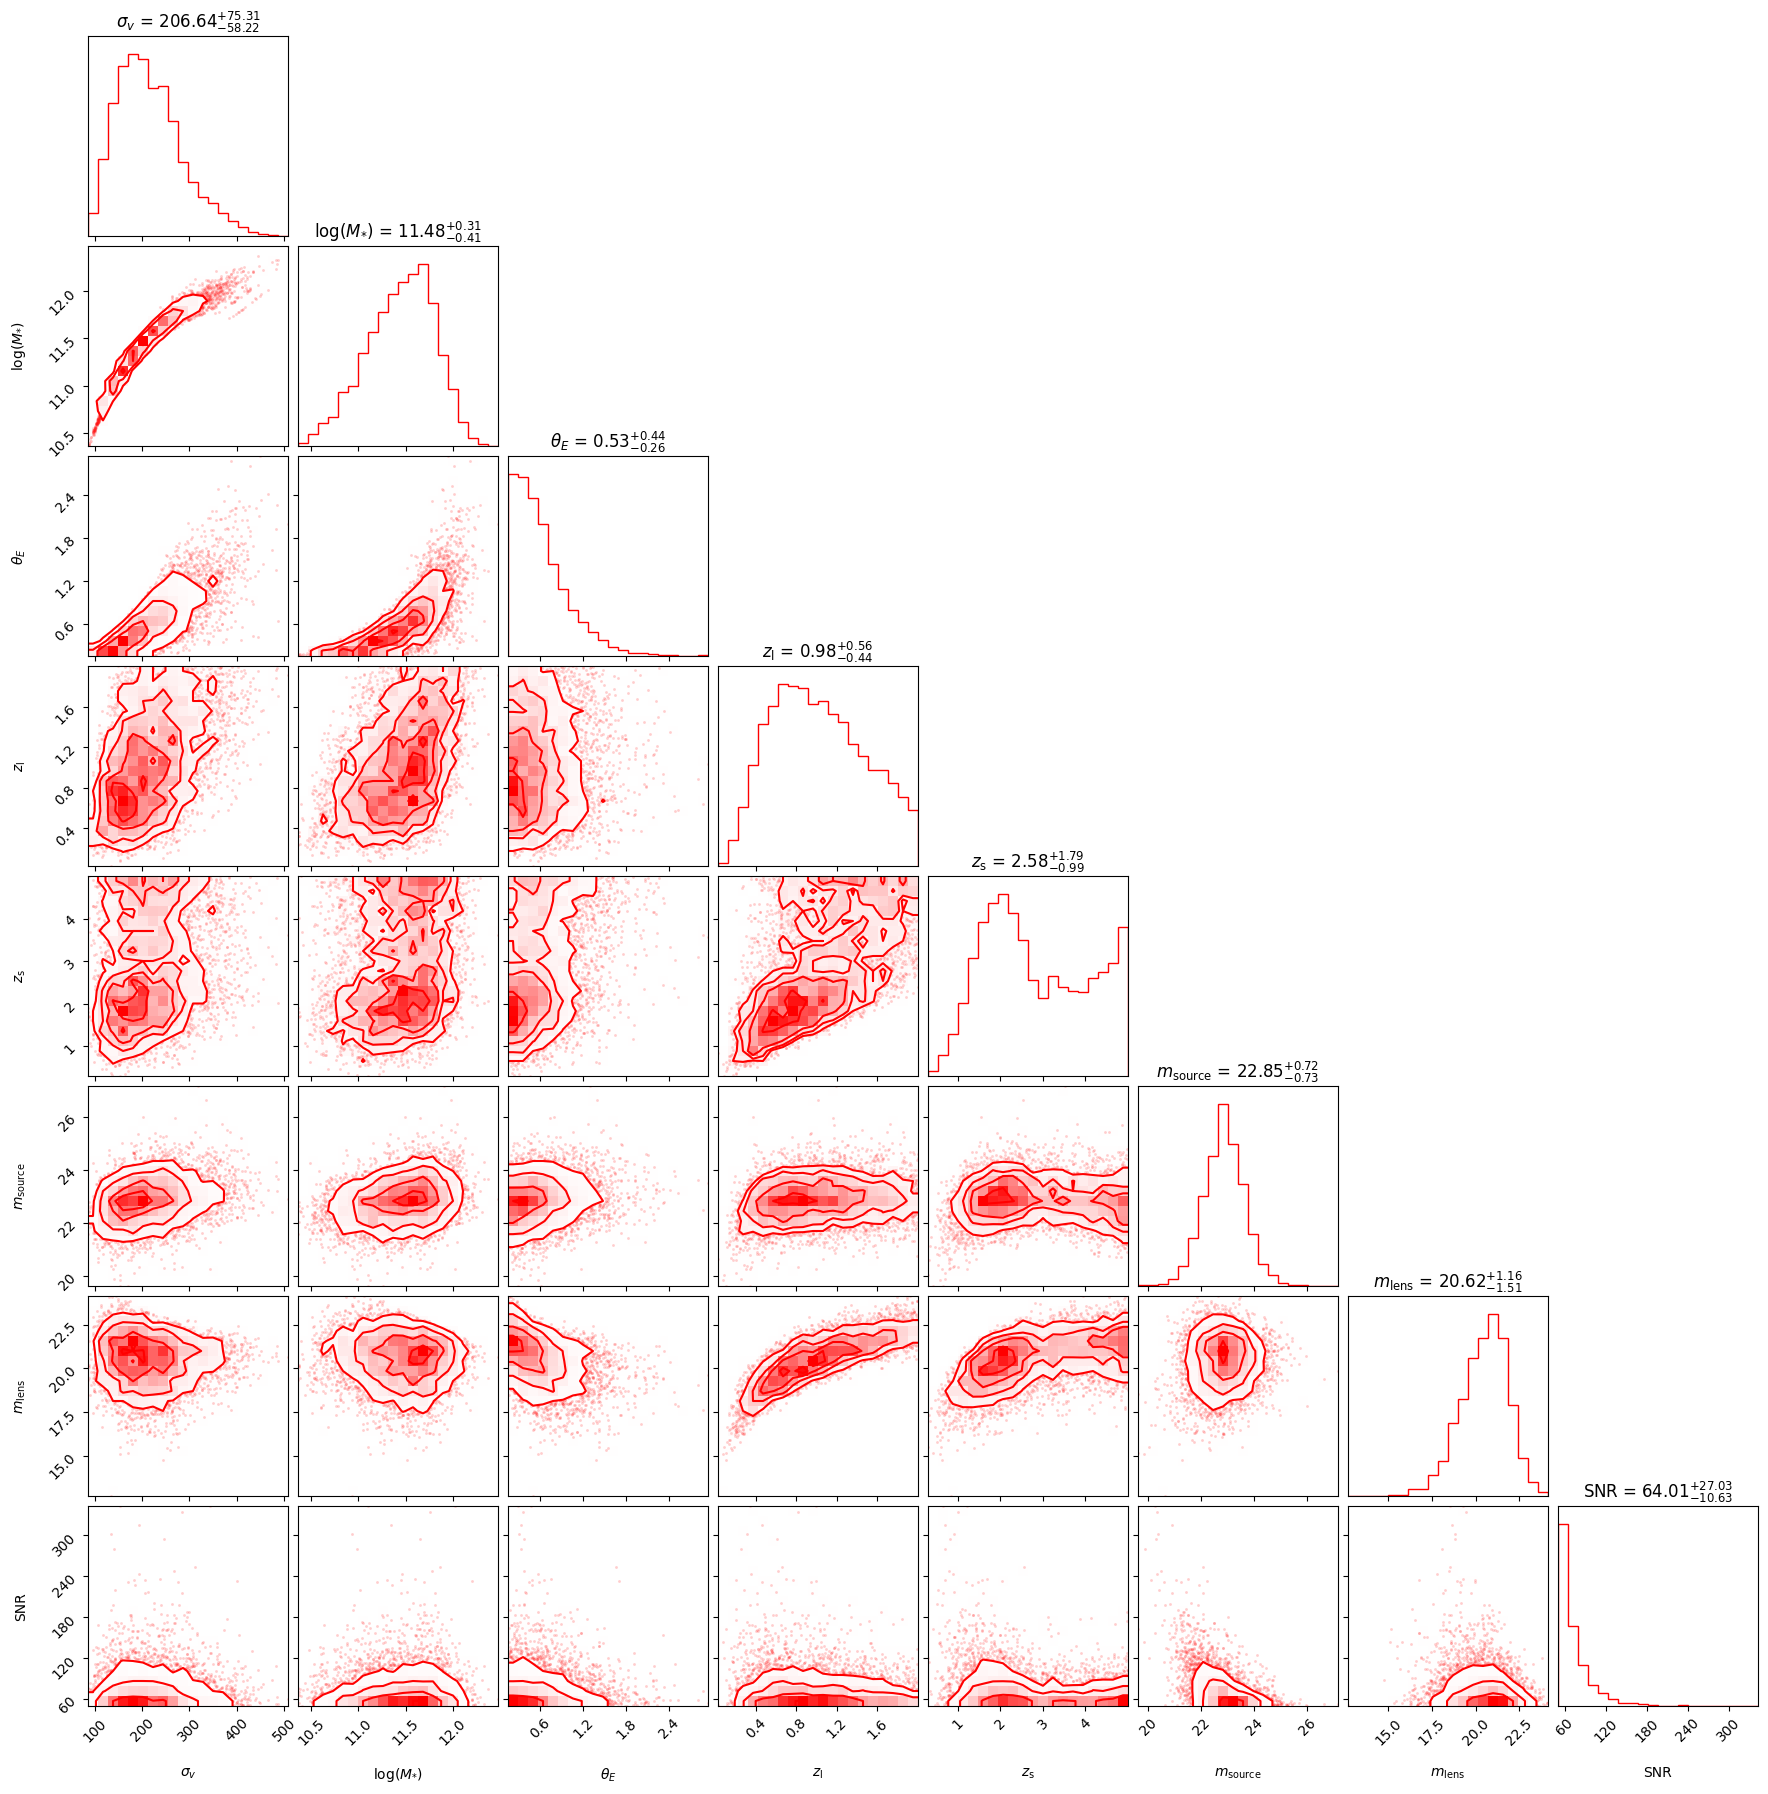

In [23]:
if total:
    corner(np.array(detectable_sample), color='red', labels=labels, show_titles=True, fig=total_corner, density=True, weights=weights(detectable_sample))
else:
    corner(np.array(detectable_sample), color='red', labels=labels, show_titles=True, density=True, weights=weights(detectable_sample))